**Estude a teoria da PCA para problemas com amostras pequenas**, onde o número de pontos de dados é menor
que a dimensão do espaço de dados (veja [3] ou a seção 12.1.4 de [1]). Escolha um banco de dados de imagens ([6],
por exemplo), converta as imagens para tons de cinza e aplique a teoria de ‘PCA para problemas com amostras pequenas’
para a redução de dimensionalidade.

1. **Seja** x a média amostral (centróide do conjunto de dados) e p1 o componente principal. Visualize o
   resultado da expressão:

   x = x + αp1

   onde α ∈ {−βλ1, 0, βλ1} com λ1 sendo o autovalor associado a p1
   e β um fator escalar (veja [5]).

2. **Estude o espectro da matriz** X^T X para realizar a redução de dimensionalidade. Visualize algumas
   imagens no espaço de dimensão reduzida.

3. **Construa um gerador de imagens** usando os d componentes principais escolhidos no item (2).



In [46]:
import os
from PIL import Image
import numpy as np
from sklearn.decomposition import PCA

Carregando conjunto de imagens:

In [47]:
image_dir = './dataset-FEI/frontalimages_spatiallynormalized/'
images = []
image_paths = []

for img_name in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_name)
    img = Image.open(img_path)
    img = img.resize((260, 360))  # Ajuste o tamanho conforme necessário
    img_array = np.array(img)
    images.append(img_array)
    image_paths.append(img_path)  # Guarda o caminho para referência futura

images = np.array(images)


In [48]:
images.shape

(400, 360, 260)

Plotando imagem exemplo:

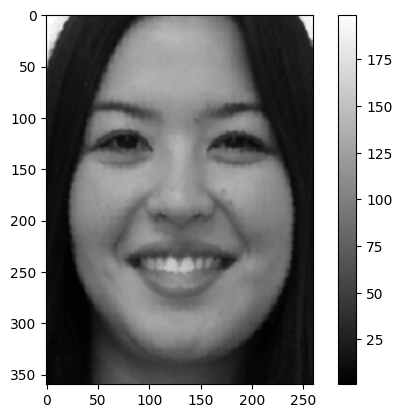

In [50]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(images[99], cmap='gray')
plt.colorbar()
plt.grid(False)

In [52]:
# Achatar as imagens em (n_samples, height * width)
images_vetorizada = images.reshape(images.shape[0], -1)

In [53]:
images_vetorizada.shape

(400, 93600)

In [54]:
# Calcular a média global de todos os elementos
global_mean = np.mean(images_vetorizada)

# Centralizar a matriz de dados subtraindo a média global
X = images_vetorizada - global_mean

MULTIPLICANDO X POR X TRANSPOSTA E CALCUANDO OS AUTOVALORES E AUTOVETORES

In [55]:
X_T = np.transpose(X)
V = np.dot(X, X_T)

autovalores, autovetoresV = np.linalg.eigh(V)

In [56]:
autovetores = np.dot(X_T, autovetoresV)

In [57]:
autovetores = autovetores / np.linalg.norm(autovetores)

In [58]:
ordem_decrescente = np.argsort(autovalores)[::-1]
autovalores = autovalores[ordem_decrescente]
autovetores = autovetores[:, ordem_decrescente]

In [62]:
autovetores_selecionados = autovetores[:, :400]

In [63]:
X_transformado = np.dot(X, autovetores_selecionados)

In [64]:
X_transformado.shape

(400, 400)

/tmp/ipykernel_1152/2939165868.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_transformado[:, 0], X_transformado[:, 1], cmap='viridis', alpha=0.7)


IndexError: string index out of range

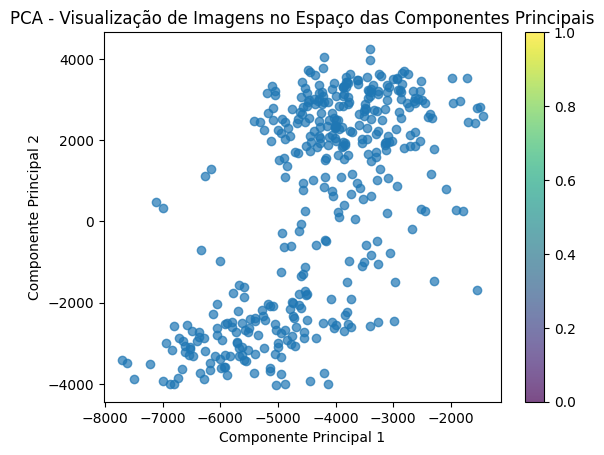

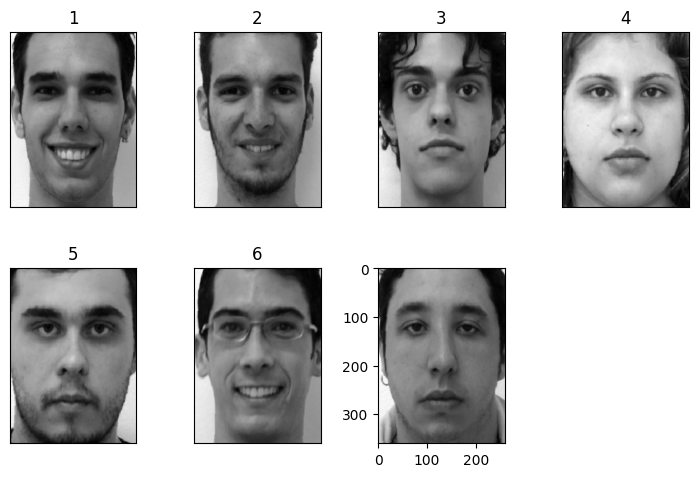

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Função para plotar imagens
def plot_images(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

#plt.scatter(X_transformado[:, 0], X_transformado[:, 1], c=Y, cmap='viridis', alpha=0.7)

# Supondo que X_transformado tem 2 dimensões e Y são as labels
plt.scatter(X_transformado[:, 0], X_transformado[:, 1], cmap='viridis', alpha=0.7)
plt.colorbar()
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Visualização de Imagens no Espaço das Componentes Principais')

# Seleciona algumas imagens para mostrar
selected_images = images[:12]  # X_original são os dados antes do PCA
#selected_titles = Y[:12]  # Rótulos correspondentes

# Plotar as imagens selecionadas
plot_images(selected_images, h=360, w=260, titles='123456')  # Para MNIST, h=28 e w=28
plt.show()


In [66]:
imagem_editada = X_transformado[1].reshape(20, 20)

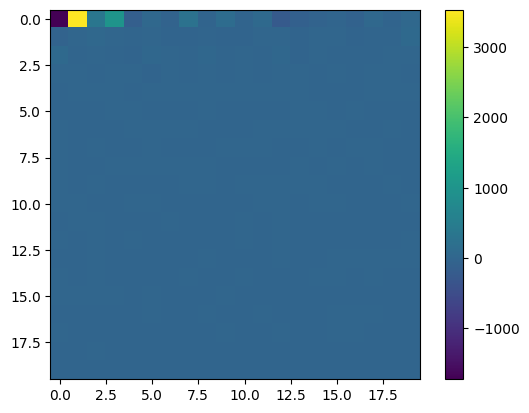

In [67]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(imagem_editada)
plt.colorbar()
plt.grid(False)
plt.show()

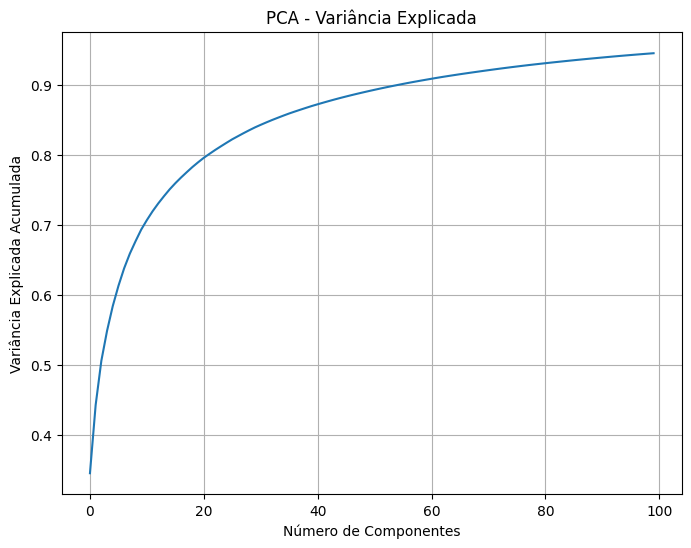

In [28]:
# Aplicar PCA
n_components = 100  # Número de componentes principais desejado
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(images)

# pca_result agora contém as imagens reduzidas em dimensões
# pca.components_ contém os componentes principais (eigenfaces)

# Visualizar a variância explicada
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('PCA - Variância Explicada')
plt.grid(True)
plt.show()

In [ ]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(pca_result[y == i, 0], pca_result[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.show()